# Working with Time Series Data Exercises

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20

import warnings
warnings.filterwarnings('ignore')

In [2]:
from vega_datasets import data
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


**Use the above dataset for the exercises below:**

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
# date is currently measured in hours, thus i need to downsample
by_hour = data.sf_temps()
by_hour

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [4]:
# I must use the date column as my index
by_hour = by_hour.set_index('date').sort_index()

In [5]:
# Resampling by the day
by_hour.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


In [6]:
# Assigning to new dataframe
by_day = by_hour.resample('D').mean()

In [7]:
by_day

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:xlabel='date'>

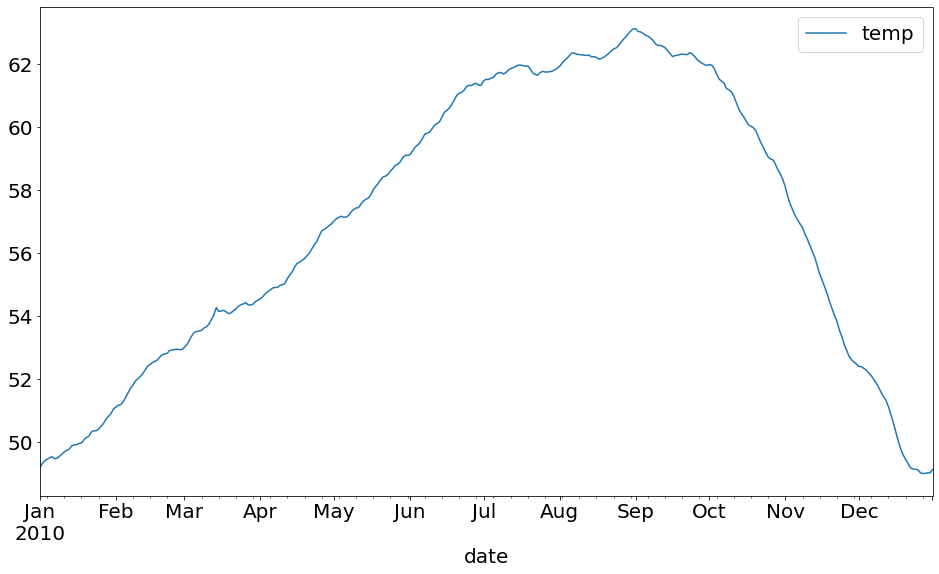

In [8]:
by_day.plot()

### 2. Write the code necessary to visualize the minimum temperature over time.

In [9]:
by_day_min = by_hour.resample('D').min()

<AxesSubplot:xlabel='date'>

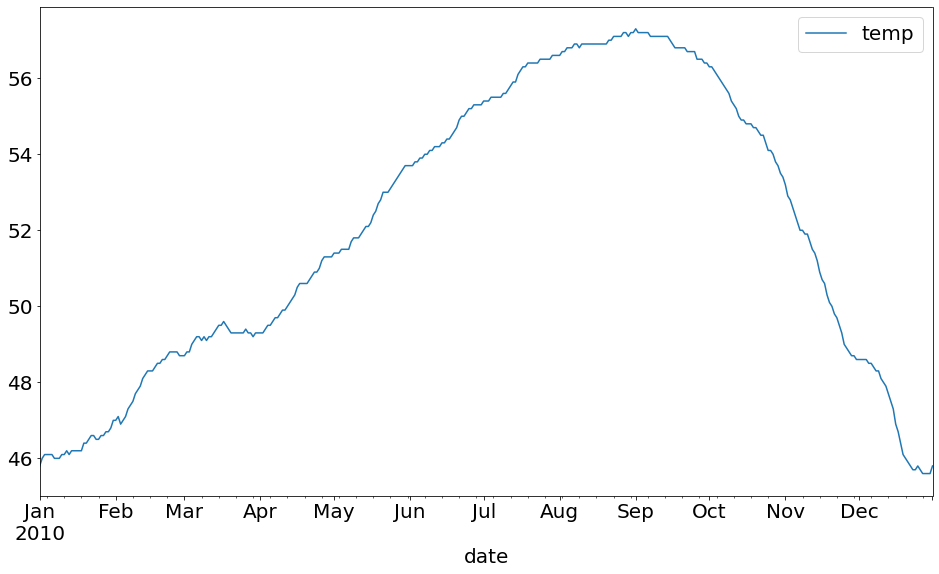

In [10]:
by_day_min.plot()

### 3. Write the code necessary to visualize the maximum temperature over time.

In [11]:
by_day_max = by_hour.resample('D').max()

<AxesSubplot:xlabel='date'>

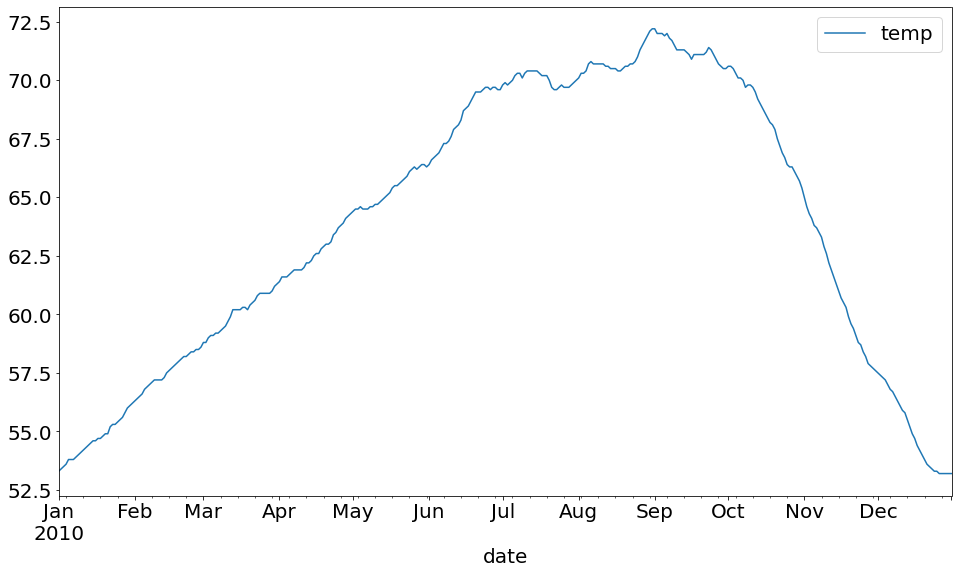

In [12]:
by_day_max.plot()

### 4. Which month is the coldest, on average?

In [13]:
by_day

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


In [14]:
by_day['month'] = by_day.index.month_name()

In [15]:
by_day

,temp,month
date,,
2010-01-01,49.170833,January
2010-01-02,49.304167,January
2010-01-03,49.391667,January
2010-01-04,49.445833,January
2010-01-05,49.491667,January
...,...,...
2010-12-27,48.991667,December
2010-12-28,49.000000,December
2010-12-29,49.012500,December


In [16]:
# Getting average temp by month
by_day.groupby('month').mean()

,temp
month,
April,55.633056
August,62.405376
December,50.498253
February,52.243899
January,49.984140
July,61.765457
June,60.444722
March,53.956948
May,57.970968


**Answer 4**\
January is the coldest month on average

### 5. Which month has the highest average temperature?

**Answer 5**\
September has the highest average temp.

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [17]:
by_hour

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [18]:
day_min_max = by_hour.resample('D').agg(['min','max'])

In [19]:
day_min_max

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [20]:
day_min_max['temp']['max']

date
2010-01-01    53.3
2010-01-02    53.4
2010-01-03    53.5
2010-01-04    53.6
2010-01-05    53.8
              ... 
2010-12-27    53.2
2010-12-28    53.2
2010-12-29    53.2
2010-12-30    53.2
2010-12-31    53.2
Freq: D, Name: max, Length: 365, dtype: float64

In [21]:
day_min_max['daily_temp_change'] = (day_min_max['temp']['max'] - day_min_max['temp']['min'])

In [22]:
day_min_max

temp       daily_temp_change
             min   max                  
date                                    
2010-01-01  45.8  53.3               7.5
2010-01-02  46.0  53.4               7.4
2010-01-03  46.1  53.5               7.4
2010-01-04  46.1  53.6               7.5
2010-01-05  46.1  53.8               7.7
...          ...   ...               ...
2010-12-27  45.6  53.2               7.6
2010-12-28  45.6  53.2               7.6
2010-12-29  45.6  53.2               7.6
2010-12-30  45.6  53.2               7.6
2010-12-31  45.8  53.2               7.4

[365 rows x 3 columns]

In [23]:
day_min_max['month'] = day_min_max.index.month_name()

In [24]:
day_min_max

temp       daily_temp_change     month
             min   max                            
date                                              
2010-01-01  45.8  53.3               7.5   January
2010-01-02  46.0  53.4               7.4   January
2010-01-03  46.1  53.5               7.4   January
2010-01-04  46.1  53.6               7.5   January
2010-01-05  46.1  53.8               7.7   January
...          ...   ...               ...       ...
2010-12-27  45.6  53.2               7.6  December
2010-12-28  45.6  53.2               7.6  December
2010-12-29  45.6  53.2               7.6  December
2010-12-30  45.6  53.2               7.6  December
2010-12-31  45.8  53.2               7.4  December

[365 rows x 4 columns]

In [25]:
day_min_max.groupby('month').mean()

temp            daily_temp_change
                 min        max                  
month                                            
April      50.326667  62.646667         12.320000
August     56.941935  70.812903         13.870968
December   47.025806  54.951613          7.925806
February   48.064286  57.550000          9.485714
January    46.309677  54.651613          8.341935
July       56.045161  70.022581         13.977419
June       54.480000  68.430000         13.950000
March      49.238710  60.093548         10.854839
May        52.403226  65.312903         12.909677
November   50.776667  61.013333         10.236667
October    54.932258  68.364516         13.432258
September  56.903333  71.306667         14.403333

**Answer 6**\
September has highest daily temp variability

### 7. Bonus:
Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [26]:
day_plot = by_hour.resample('D').agg(['min','mean','max'])
day_plot

temp                 
             min       mean   max
date                             
2010-01-01  45.8  49.170833  53.3
2010-01-02  46.0  49.304167  53.4
2010-01-03  46.1  49.391667  53.5
2010-01-04  46.1  49.445833  53.6
2010-01-05  46.1  49.491667  53.8
...          ...        ...   ...
2010-12-27  45.6  48.991667  53.2
2010-12-28  45.6  49.000000  53.2
2010-12-29  45.6  49.012500  53.2
2010-12-30  45.6  49.012500  53.2
2010-12-31  45.8  49.116667  53.2

[365 rows x 3 columns]

In [33]:
by_day

,temp,month
date,,
2010-01-01,49.170833,January
2010-01-02,49.304167,January
2010-01-03,49.391667,January
2010-01-04,49.445833,January
2010-01-05,49.491667,January
...,...,...
2010-12-27,48.991667,December
2010-12-28,49.000000,December
2010-12-29,49.012500,December


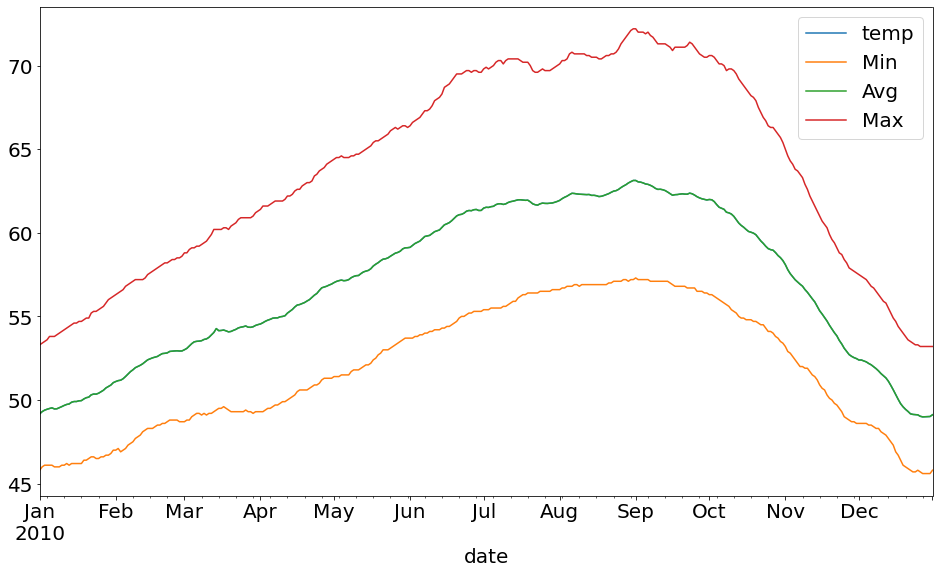

In [34]:
by_day.temp.plot(label='Daily')
by_hour.resample('D').min().temp.plot(label='Min')
by_hour.resample('D').mean().temp.plot(label='Avg')
by_hour.resample('D').max().temp.plot(label='Max')
plt.legend()
plt.show()